In [1]:
import pathlib
import IPython.display as display
import scipy.io as sio 
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 
import random
import os
import glob
from itertools import product
import pandas as pd

# Load CSV

In [2]:
df = pd.read_csv("train_relationships.csv")

# Split Train X,y

In [3]:
parents_path =[("./train/"+row)for row in df["p1"]]
childs_path =[("./train/"+row)for row in df["p2"]]

In [4]:
df.iloc[121:133]

,p1,p2
121,F0038/MID1,F0038/MID4
122,F0038/MID1,F0038/MID6
123,F0038/MID2,F0038/MID4
124,F0038/MID3,F0038/MID6
125,F0038/MID3,F0038/MID5
126,F0038/MID5,F0038/MID6
127,F0039/MID1,F0039/MID4
128,F0039/MID1,F0039/MID3
129,F0040/MID1,F0040/MID3
130,F0041/MID1,F0041/MID6


# Product n of Parent * child

In [5]:
dataset_path=[]
trainX=[]
trainY=[]
#np.random.shuffle(X)
for  x,y  in zip(parents_path,childs_path):
    parents = [ ".\\"+str(filename) for filename  in pathlib.Path(x).glob('*.jpg')]
    childs = [ ".\\"+str(filename) for filename  in pathlib.Path(y).glob('*.jpg')]
    family = list(product(parents,childs))
    if len(parents)==0 or len(childs)==0:
        print("NOT FOUND parent {0} child {1}   {2} and {3}".format(len(parents),len(childs),str(x),str(y)))
        continue
        # data set link broken
    parent , child = zip(*family)
    
    #print("\n")
    trainX.extend(parent)
    trainY.extend(child)
print(len(trainX), len(trainY))

NOT FOUND parent 4 child 0   ./train/F0039/MID1 and ./train/F0039/MID3
NOT FOUND parent 13 child 0   ./train/F0041/MID1 and ./train/F0041/MID7
NOT FOUND parent 0 child 2   ./train/F0041/MID3 and ./train/F0041/MID4
NOT FOUND parent 0 child 0   ./train/F0041/MID5 and ./train/F0041/MID7
NOT FOUND parent 0 child 5   ./train/F0051/MID5 and ./train/F0051/MID1
NOT FOUND parent 0 child 1   ./train/F0051/MID5 and ./train/F0051/MID3
NOT FOUND parent 0 child 4   ./train/F0051/MID5 and ./train/F0051/MID4
NOT FOUND parent 0 child 6   ./train/F0058/MID2 and ./train/F0058/MID4
NOT FOUND parent 0 child 1   ./train/F0058/MID2 and ./train/F0058/MID5
NOT FOUND parent 0 child 14   ./train/F0058/MID2 and ./train/F0058/MID1
NOT FOUND parent 8 child 0   ./train/F0070/MID1 and ./train/F0070/MID3
NOT FOUND parent 8 child 0   ./train/F0070/MID2 and ./train/F0070/MID3
NOT FOUND parent 0 child 2   ./train/F0070/MID3 and ./train/F0070/MID4
NOT FOUND parent 0 child 3   ./train/F0070/MID3 and ./train/F0070/MID5
NOT 

NOT FOUND parent 6 child 0   ./train/F0524/MID3 and ./train/F0524/MID4
NOT FOUND parent 13 child 0   ./train/F0548/MID1 and ./train/F0548/MID4
NOT FOUND parent 10 child 0   ./train/F0548/MID2 and ./train/F0548/MID4
NOT FOUND parent 6 child 0   ./train/F0548/MID3 and ./train/F0548/MID4
NOT FOUND parent 5 child 0   ./train/F0574/MID1 and ./train/F0574/MID3
NOT FOUND parent 7 child 0   ./train/F0574/MID2 and ./train/F0574/MID3
NOT FOUND parent 0 child 2   ./train/F0592/MID5 and ./train/F0592/MID3
NOT FOUND parent 0 child 4   ./train/F0592/MID5 and ./train/F0592/MID2
NOT FOUND parent 43 child 0   ./train/F0601/MID20 and ./train/F0601/MID38
NOT FOUND parent 95 child 0   ./train/F0601/MID6 and ./train/F0601/MID38
NOT FOUND parent 9 child 0   ./train/F0625/MID1 and ./train/F0625/MID5
NOT FOUND parent 9 child 0   ./train/F0625/MID1 and ./train/F0625/MID6
NOT FOUND parent 0 child 0   ./train/F0625/MID5 and ./train/F0625/MID6
NOT FOUND parent 12 child 0   ./train/F0658/MID1 and ./train/F0658/MID

# Shuffle Dataset

In [6]:
temp = list(zip(trainX, trainY))
print([i for i in temp[30]])
np.random.shuffle(temp)
print([i for i in temp[30]])
trainX,trainY =zip(*temp)


['.\\train\\F0002\\MID1\\P00012_face2.jpg', '.\\train\\F0002\\MID3\\P00017_face1.jpg']
['.\\train\\F0556\\MID5\\P05848_face2.jpg', '.\\train\\F0556\\MID1\\P05841_face1.jpg']


# Observe Random Sample

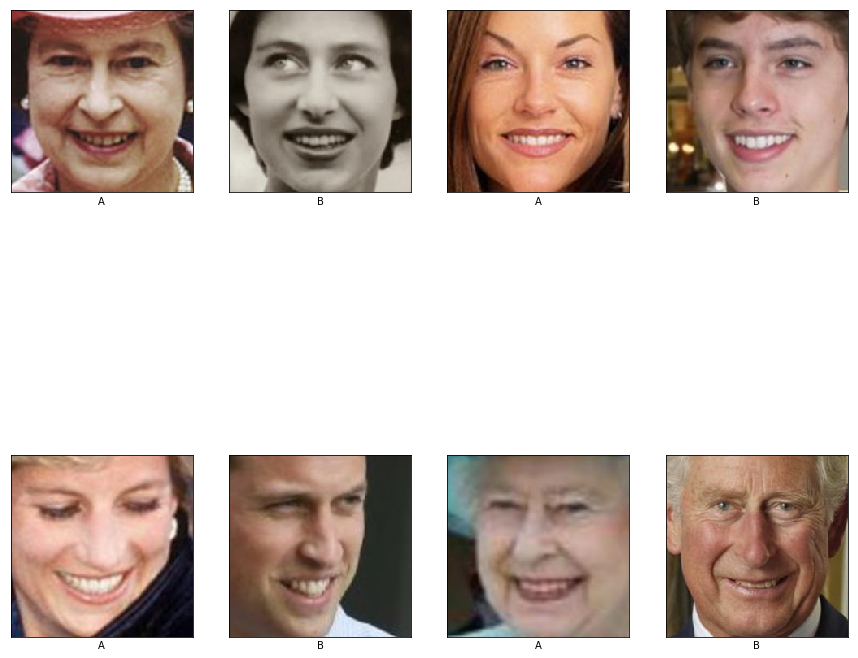

In [7]:
plt.figure(figsize=(15,15))
col = 1
for n in range(4):
    index = random.choice(range(len(trainX)))
    a = trainX[index]
    b = trainY[index]
    plt.subplot(2,4,col)
    a = cv2.cvtColor(cv2.imread(a ), cv2.COLOR_BGR2RGB)
    plt.imshow(a)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("A")
    col=col+1

    b = cv2.cvtColor(cv2.imread(b ), cv2.COLOR_BGR2RGB)
    plt.subplot(2,4,col)
    plt.imshow(b)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("B")
    col=col+1